# Dimensionality Reduction using <font color=red>Autoencoding</font>

- We baseline digit classfication first (It is done in <a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Dimensionality%20Reduction%20using%20Clustering.ipynb'/>Dimensionality Reduction using Clustering</a>. Later, we will use dimensionality reduction using Autoencoding (unsupervised learning) and apply the classification on reduced features to study the performance, etc.
- Both Clustering and Autoencoding comes under unsupervised models

In [3]:
import numpy as np
import keras
import gzip

from matplotlib import pyplot as plt

In [5]:
IMAGE_FEATURES = 28 * 28

In [6]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_FEATURES * num_images)
        
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_FEATURES)
        
        return data

In [7]:
train_data = extract_data('Data/train-images-idx3-ubyte.gz', 60000)
test_data = extract_data('Data/t10k-images-idx3-ubyte.gz', 10000)

In [8]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [9]:
label_dict = {
    0: 'A',
    1: 'B',    
    2: 'C',    
    3: 'D',    
    4: 'E',    
    5: 'F',    
    6: 'G',    
    7: 'H',    
    8: 'I',    
    9: 'J',    
}

In [10]:
def display_image(image_pixels):
    plt.imshow(image_pixels.reshape(28, 28), cmap='gray')

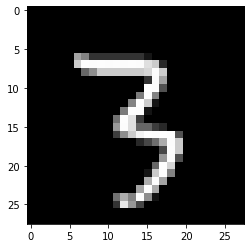

In [12]:
display_image(train_data[44])

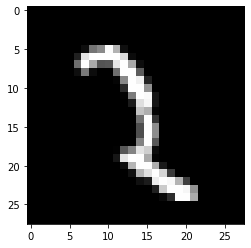

In [13]:
display_image(train_data[444])

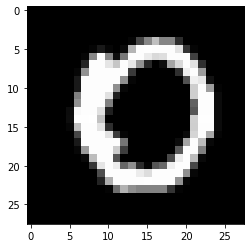

In [14]:
display_image(train_data[4444])

In [16]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [17]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [18]:
# It is observed that neural networks work better with smaller values
# So, let us scale the pixel intesities to stay between 0 and 1

train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

In [19]:
np.max(train_data), np.max(test_data)

(1.0, 1.0)

__Dimensionality Reduction using <font color=red>Autoencoding__</font>

In [21]:
from keras.models import Model

from keras.optimizers import RMSprop
from keras.layers import Input, Dense

In [22]:
batch_size = 128
epochs = 1

input_img = Input(shape=(IMAGE_FEATURES, ))

In [25]:
def autoencoder(input_img):
    encoding1 = Dense(784, activation='relu')(input_img)
    encoding2 = Dense(256, activation='relu')(encoding1)
    
    codings = Dense(64, activation='relu')(encoding2)
    
    decoding2 = Dense(256, activation='relu')(codings)
    decoding1 = Dense(784, activation='relu')(decoding2)
    
    return decoding1

In [26]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer=RMSprop())

In [27]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
_________________________________________________

In [28]:
autoencoder_train = autoencoder.fit(train_data, train_data, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(train_data, train_data))

Train on 60000 samples, validate on 60000 samples
Epoch 1/1
60000/60000 [==============================] - 17s 278us/step - loss: 0.0335 - val_loss: 0.0228


In [29]:
pred = autoencoder.predict(test_data)
pred.shape

(10000, 784)

Original


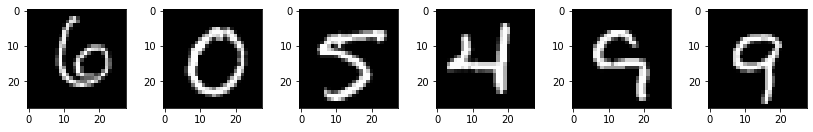

Reconstruction


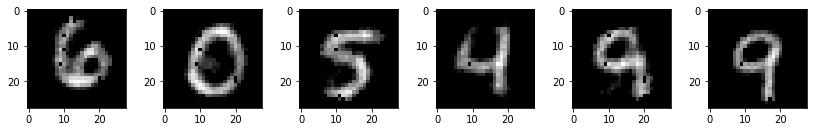

In [31]:
plt.figure(figsize=(24, 4))
print('Original')

pos = 0
for i in range(100, 106):
    plt.subplot(2, 10, pos+1)
    img = test_data[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos = pos + 1
    
plt.show()

plt.figure(figsize=(24, 4))
print('Reconstruction')

pos = 0
for i in range(100, 106):
    plt.subplot(2, 10, pos+1)
    img = pred[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos = pos + 1
    
plt.show()

Observations:
- With just 1 epoch we've achieved above results
- Increase epochs to get better results